2024-02-17 07:04:10.286056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-17 07:04:10.891223: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Processing project b5_hetero
Output will be saved to:
 /home/tuttle/data/HDX-MS/sHSP_Heterooligomers/b5_hetero/SpecExport/testing 

Found 3 sample types with 495 total datasets to analyze.
Dataframe filtered to 1 from 495 total entries


,file,sample,charge,peptide_range,start_seq,end_seq,peptide
82,0029-0033-GEHLL,B5_B1B5,1.0,0029-0033,29,33,GEHLL


Saving config parameters to testing/hdxms_params_17Feb2024.py


Dataset 82 ( 1 of 1 )
Performing fits for B5_B1B5 0029-0033: GEHLL z=1
Time point: 5s Rep: 1 Npops: 2               
min population below threshold: falling back to 1 curve(s)
Time point: 60s Rep: 1 Npops: 2           
min population below threshold: falling back to 1 curve(s)
saving figure as  hxex_B5_B1B5_0029-0033_z1_IndFits_17Feb2024


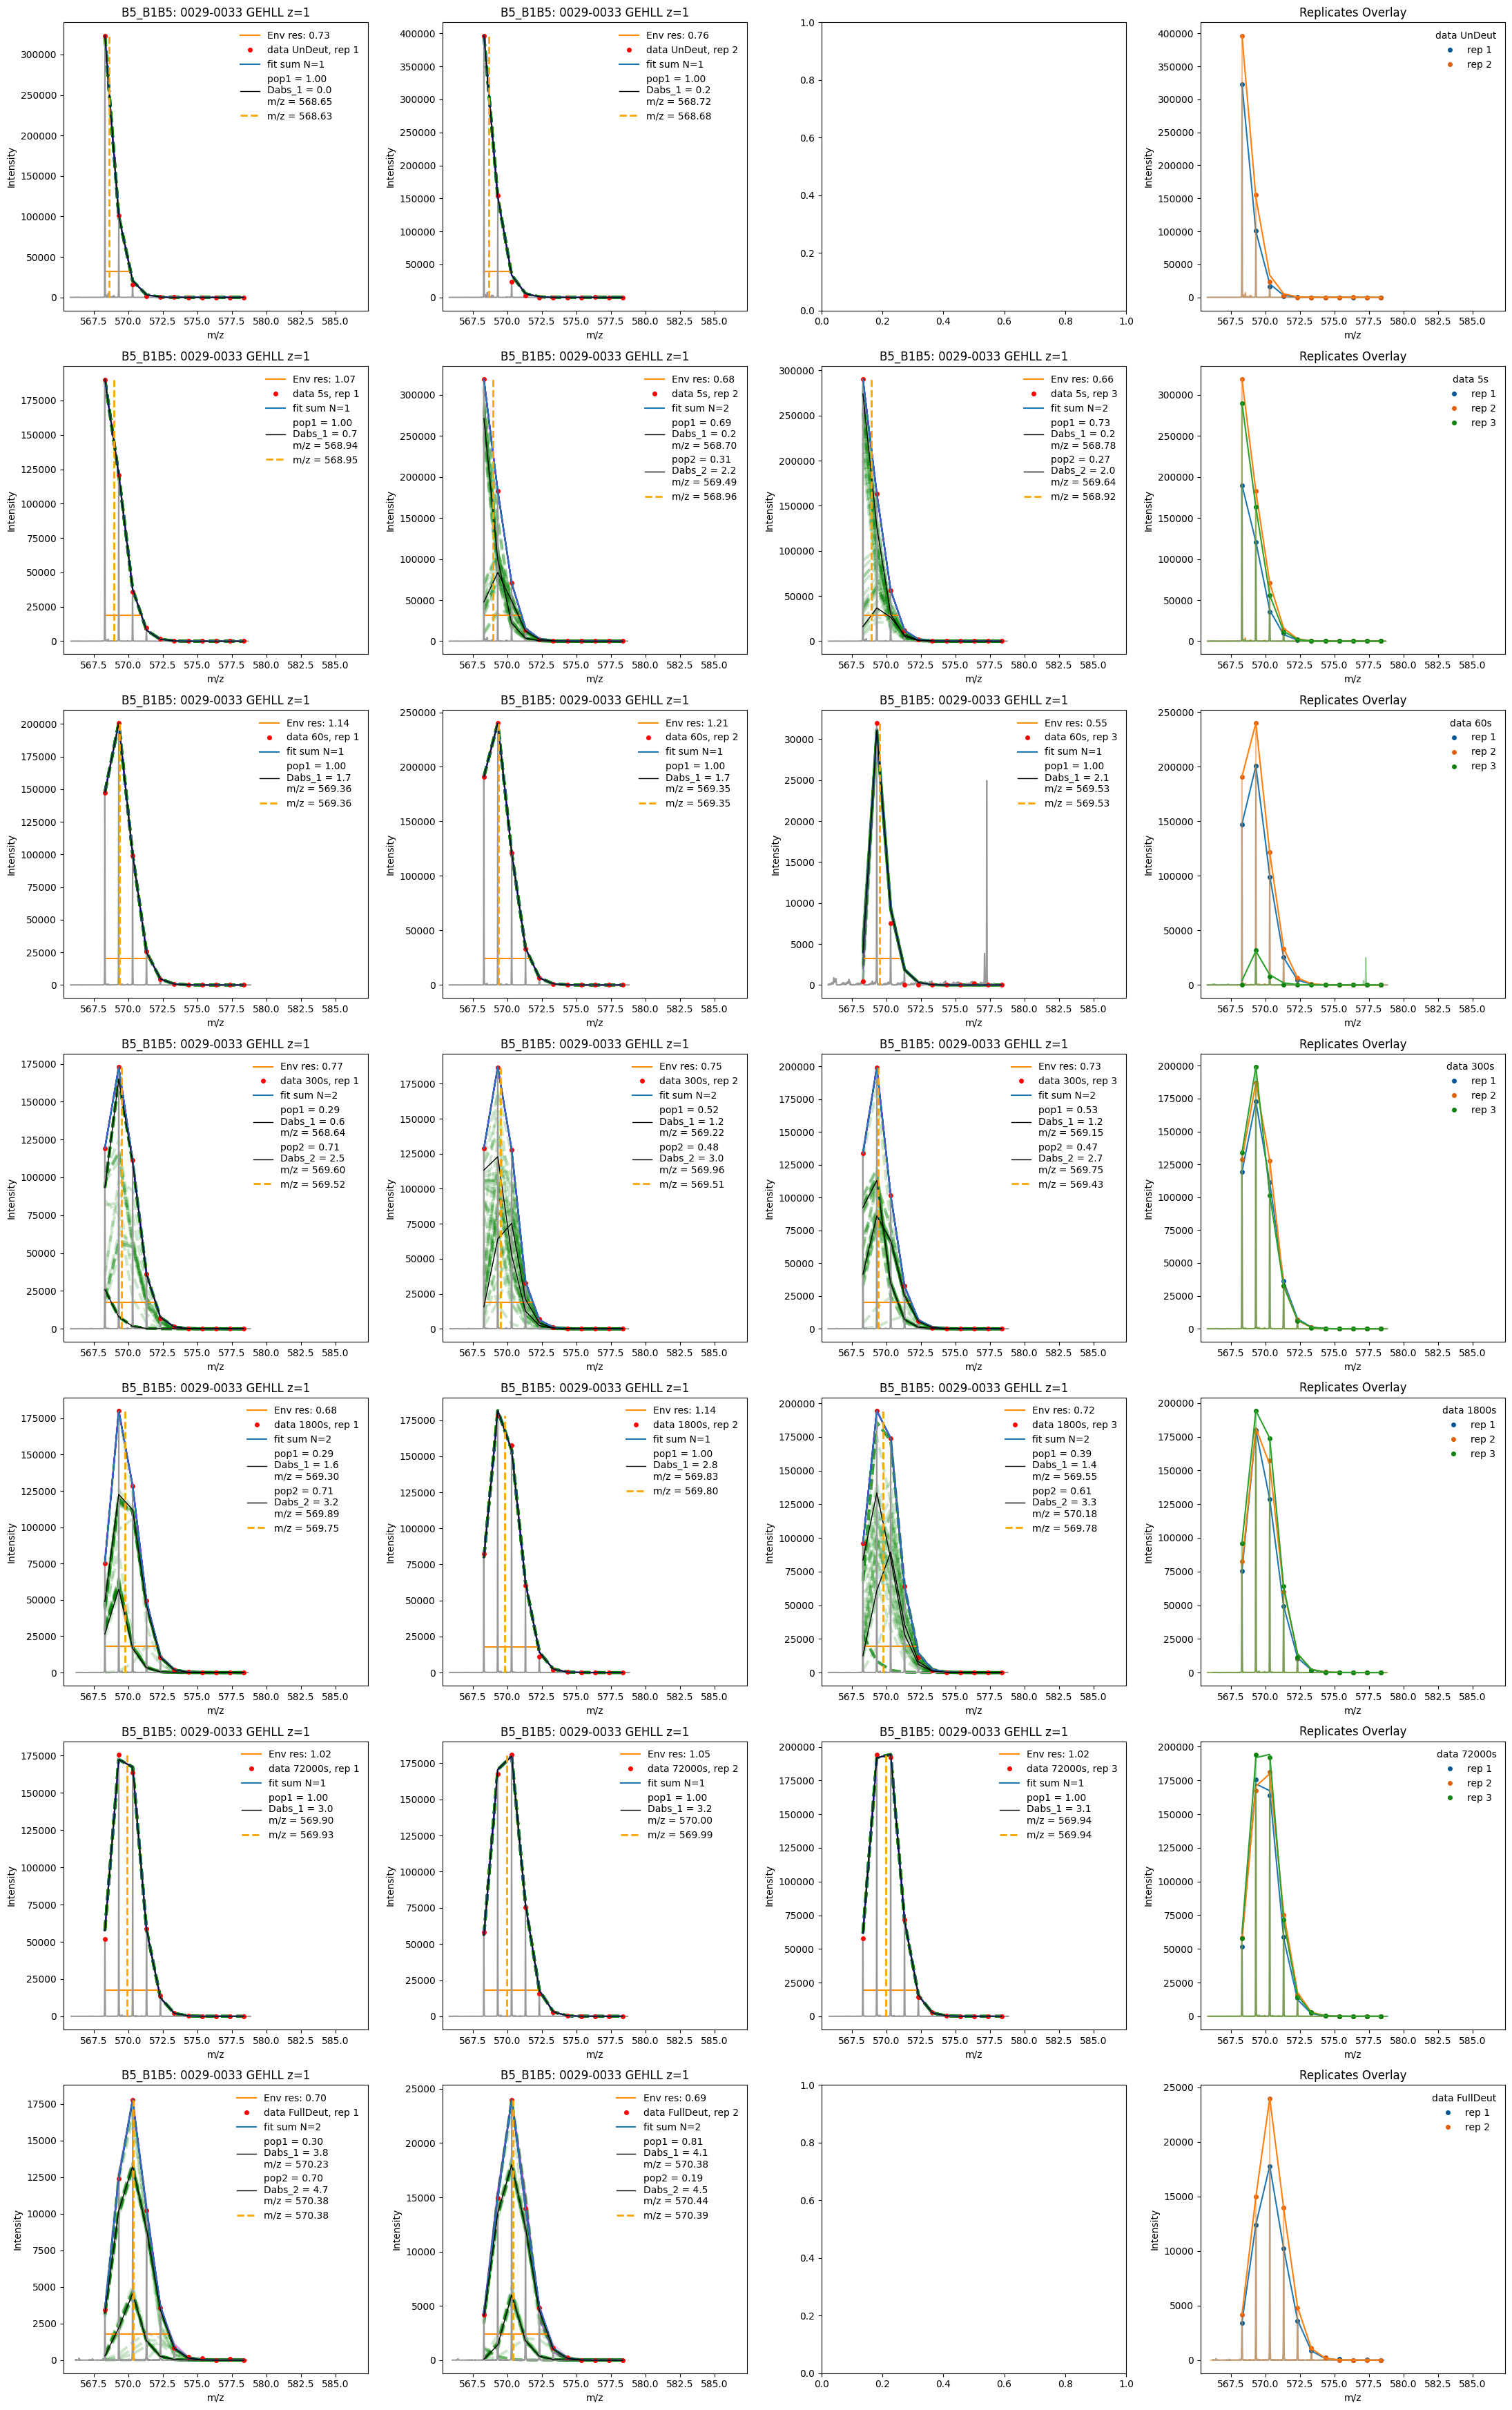

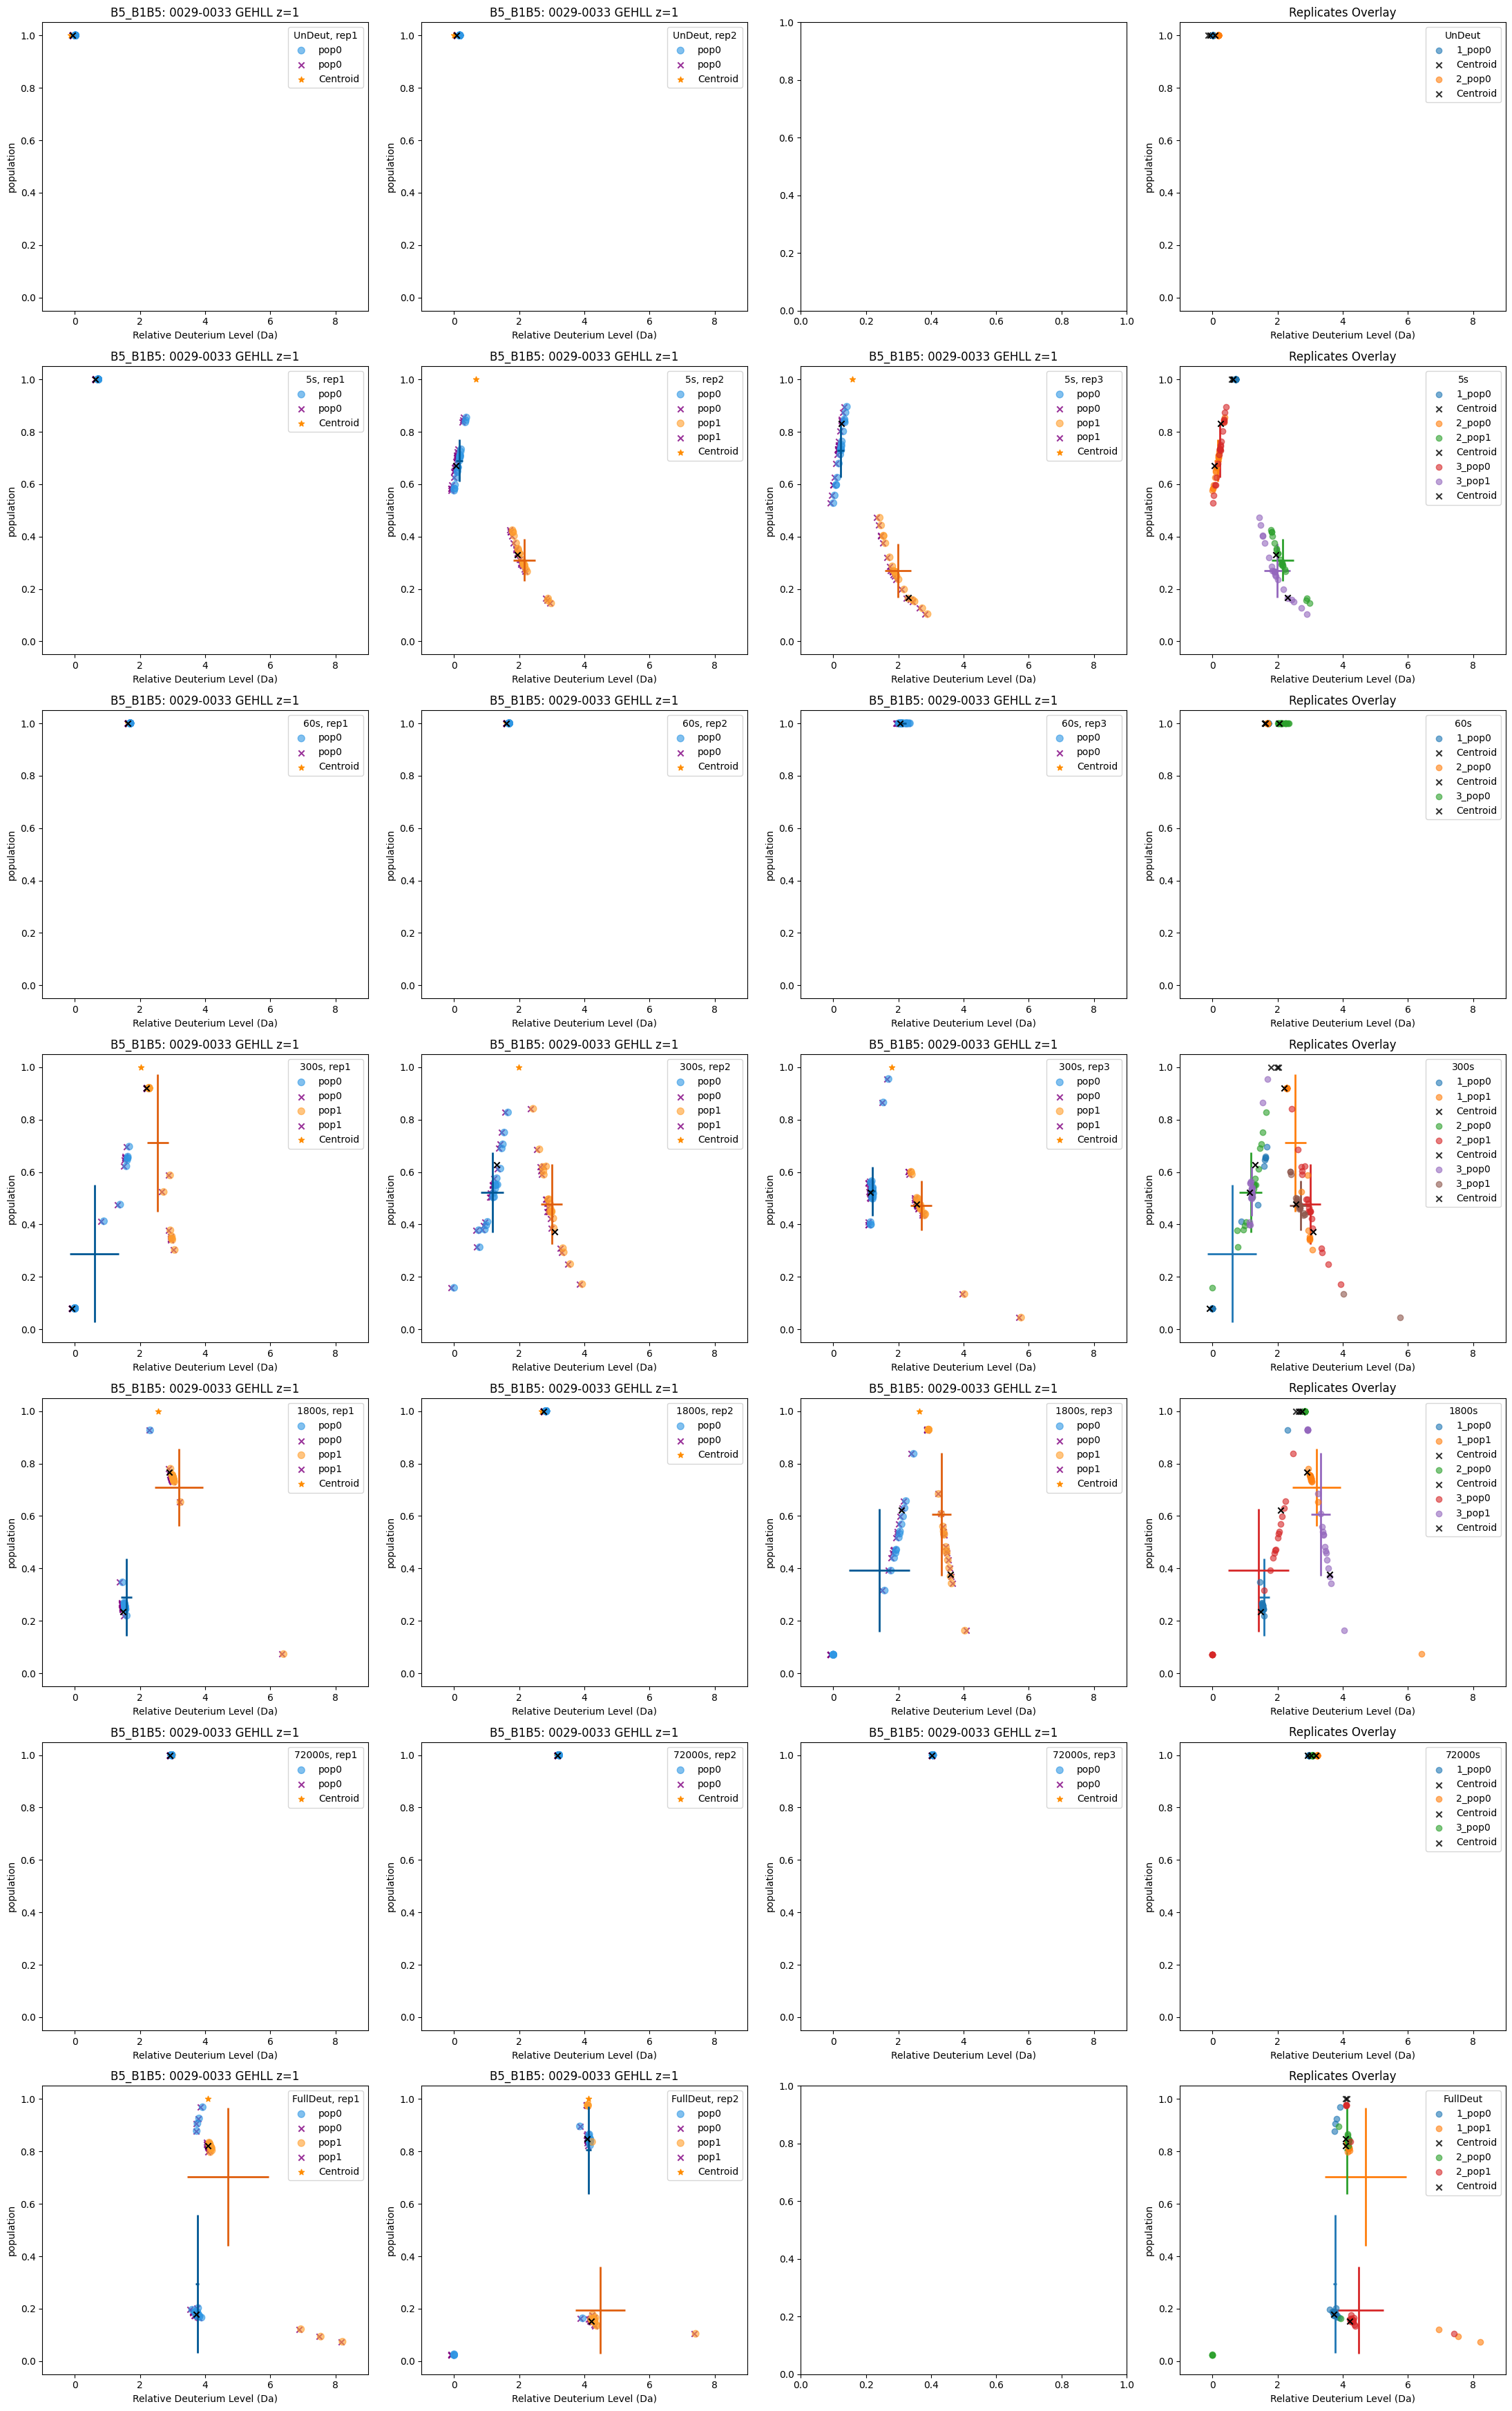

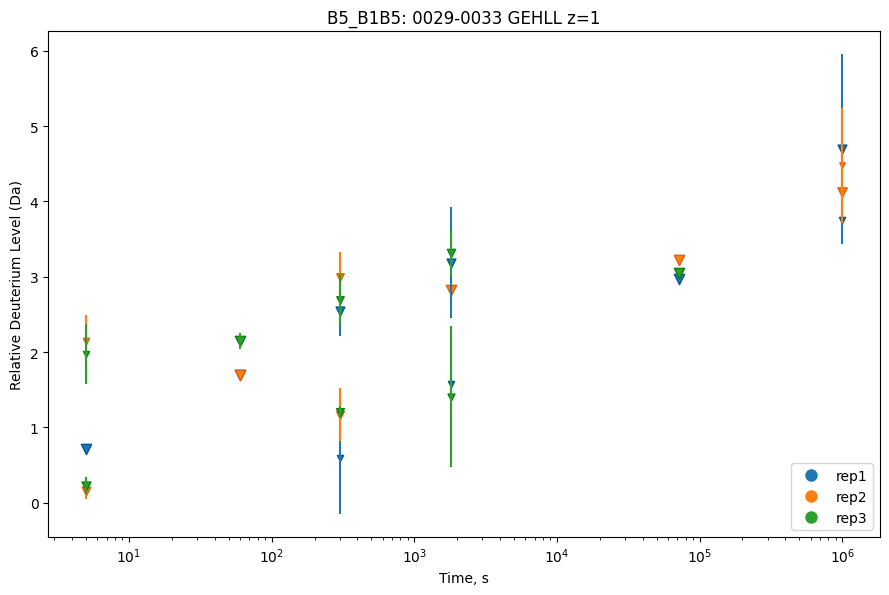

saving figure as  hxex_B5_B1B5_0029-0033_z1_BootFits_17Feb2024
saving figure as  hxex_B5_B1B5_0029-0033_z1_ndeutBoot_17Feb2024
Saving results table to /home/tuttle/data/HDX-MS/sHSP_Heterooligomers/b5_hetero/SpecExport/testing/data_fits17Feb2024.csv
Saving picked peaks as alldeutdata_ and Raw spectral data as allrawdata_


In [1]:
import os
import importlib
import pyhxexpress as hxex
import numpy as np, pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)
#%pip install tensorflow==2.13.0
# import tensorflow as tf
# from keras.models import load_model
#import config  
#import hdxms_params_22Dec2023 as config
#import test_config as config
import config_shsp as config

def hxex_reload():
    importlib.reload(hxex)
    importlib.reload(config)
    hxex.config = config

hxex_reload()
#help(hxex)

hxex.config.Hide_Figure_Output = False
hxex.config.Min_Pops = 1
hxex.config.Max_Pops = 2
base_path = '/home/tuttle/data/HDX-MS/sHSP_Heterooligomers/'
projects = ['b5_hetero']#,'b6_hetero'] #,'b1_hetero',

metadfs = {}
for p in projects:
    print("Processing project",p)
    hxex.config.Ncurve_p_accept = 0.01
    hxex.config.Pop_Thresh = 0.05
    hxex.config.Data_DIR = os.path.join(base_path,p,'SpecExport')
    hxex.config.Output_DIR = os.path.join(hxex.config.Data_DIR,'testing')#+str(config.date))
    if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)
    print("Output will be saved to:\n",hxex.config.Output_DIR,"\n")
    metadfs[p] = hxex.get_metadf()
    filtered = hxex.filter_df(metadfs[p],quiet=False,index=[*range(82,83)])
    display(filtered)
    hxex.run_hdx_fits(filtered)
    #hxex.run_hdx_fits(metadfs[p])
    

#model = load_model('model5_2000peps_4feat_31jan24.h5')

#metadf = hxex.get_metadf()
#filtered = metadf[3:5]
# filtered = hxex.filter_df(metadf,range=[113,210],index=[*range(382,385)])#,charge=2, samples='B1B5')
#display(metadf)
#display(filtered)
#hxex.run_hdx_fits(filtered)
#hxex.run_hdx_fits(metadf)
#hxex.run_hdx_fits(metadf[::-1]) #go in reverse order 
#deut, raw = hxex.get_data(metadf)
#deut_pred = hxex.predict_pops(model,deut)
#deut_pred_reduced = deut_pred.copy()[deut_pred['n_deut']==0].drop(columns=['mz','Intensity','n_deut'])



In [26]:
# testdf = hxex.data_fit.copy()
fitparams_all = pd.DataFrame()
# sample_id_cols = ['data_id','sample', 'peptide', 'peptide_range','charge', 'time', 'rep']
fit = [0,1,2,3,4.5]
for i in range(0,5):
    fitparams = pd.DataFrame()
    fitparams[sample_id_cols] = testdf[sample_id_cols]  
    fitparams['p-value'] = 0.00534+i*0.1
    fitparams['params'] = (' ').join(map(str,fit))
    fitparams['ncurves'] = 1
    fitparams['nboot'] = 0
    fitparams['rss'] = 0.011165464+i*0.05
    display(fitparams)
    fitparams_all = pd.concat([fitparams_all,fitparams],ignore_index=True)
display(fitparams_all)


,data_id,sample,peptide,peptide_range,charge,time,rep,p-value,params,ncurves,nboot,rss
0,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.00534,0 1 2 3 4.5,1,0,0.011165


,data_id,sample,peptide,peptide_range,charge,time,rep,p-value,params,ncurves,nboot,rss
0,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.10534,0 1 2 3 4.5,1,0,0.061165


,data_id,sample,peptide,peptide_range,charge,time,rep,p-value,params,ncurves,nboot,rss
0,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.20534,0 1 2 3 4.5,1,0,0.111165


,data_id,sample,peptide,peptide_range,charge,time,rep,p-value,params,ncurves,nboot,rss
0,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.30534,0 1 2 3 4.5,1,0,0.161165


,data_id,sample,peptide,peptide_range,charge,time,rep,p-value,params,ncurves,nboot,rss
0,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.40534,0 1 2 3 4.5,1,0,0.211165


,data_id,sample,peptide,peptide_range,charge,time,rep,p-value,params,ncurves,nboot,rss
0,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.00534,0 1 2 3 4.5,1,0,0.011165
1,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.10534,0 1 2 3 4.5,1,0,0.061165
2,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.20534,0 1 2 3 4.5,1,0,0.111165
3,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.30534,0 1 2 3 4.5,1,0,0.161165
4,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.40534,0 1 2 3 4.5,1,0,0.211165


In [29]:
# ps = np.random.random((20,7))
# prss = np.random.random((20,1))
for pb in range(len(prss)):
    fitparams = pd.DataFrame()
    fitparams[sample_id_cols] = testdf[sample_id_cols]  
    fitparams['p-value'] = 0.00534+i*0.1
    fitparams['ncurves'] = 1
    fitparams['nboot'] = pb+1
    fitparams['rss'] = prss[pb]
    fitparams['params']= (' ').join(map(str,ps[pb]))
    fitparams_all = pd.concat([fitparams_all,fitparams],ignore_index=True)
display(fitparams_all)

,data_id,sample,peptide,peptide_range,charge,time,rep,p-value,params,ncurves,nboot,rss
0,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.00534,0 1 2 3 4.5,1,0,0.011165
1,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.10534,0 1 2 3 4.5,1,0,0.061165
2,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.20534,0 1 2 3 4.5,1,0,0.111165
3,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.30534,0 1 2 3 4.5,1,0,0.161165
4,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.40534,0 1 2 3 4.5,1,0,0.211165
...,...,...,...,...,...,...,...,...,...,...,...,...
60,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.40534,0.3003203062016552 0.1724321999645816 0.519512...,1,16,0.033289
61,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.40534,0.8553806521151089 0.39243131464489345 0.24327...,1,17,0.296541
62,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.40534,0.6603627460906754 0.4756145886771248 0.385958...,1,18,0.324413
63,465,B5_B5B6,YRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKP...,0122-0175,5.0,1000000,2,0.40534,0.03450309528722051 0.6638259475260133 0.05588...,1,19,0.691362


In [53]:

print("metadf")

display(filtered.head(5))
print("fitparams_all")
display(hxex.fitparams_all.head(5))
print("data_fits")
display(hxex.data_fits.head(5))


metadf


,file,sample,charge,peptide_range,start_seq,end_seq,peptide
50,0024-0027-FDQF,B5_B5B6,1.0,0024-0027,24,27,FDQF
51,0024-0027-FDQF,HSPB5,1.0,0024-0027,24,27,FDQF
52,0025-0033-DQFFGEHLL,B5_B1B5,2.0,0025-0033,25,33,DQFFGEHLL


fitparams_all


,data_id,sample,peptide,peptide_range,start_seq,end_seq,charge,time,rep,ncurves,nboot,rss,Fit_Params,p-value
0,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,1,0,0.000014,0.0016859367318170645 0.99546578887102 0.014599569304309173 0.9999999999,1.0
1,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,2,0,0.000014,0.0015532056319675681 0.37180296349728936 0.2503800404467767 0.08852921717990145 0.0533206189272848 0.029962423389184728 0.9700402101888019,1.0
2,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,1,1,0.000001,0.00170106394872985 0.9934058425234572 0.014559736966760845 1.0,1.0
3,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,1,2,0.000001,0.0016643842624650261 0.9960042442389392 0.01453455162567572 1.0,1.0
4,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,1,3,0.000001,0.0016951153772151463 0.7622672919932713 0.01904587059131767 1.0,1.0


data_fits


,data_id,sample,peptide,peptide_range,start_seq,end_seq,charge,time,rep,centroid,env_width,env_symm,max_namides,fit_pops,p-value,centroid_1,Dabs_1,Dabs_std_1,pop_1,pop_std_1,centroid_2,Dabs_2,Dabs_std_2,pop_2,pop_std_2,centroid_3,Dabs_3,Dabs_std_3,pop_3,pop_std_3
0,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,556.59136,1.899016,2.0,3,1,1.0,556.603356,0.044132,0.000161,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,2,556.595567,1.886893,2.0,3,1,1.0,556.630163,0.124415,0.00047,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50,B5_B5B6,FDQF,0024-0027,24,27,1,5,1,556.866889,2.681363,2.0,3,2,0.00105,556.589699,0.140018,0.135133,0.720516,0.078262,557.403859,2.865105,0.527893,0.279484,0.078262,NaN,NaN,NaN,NaN,NaN
3,50,B5_B5B6,FDQF,0024-0027,24,27,1,5,2,556.848814,2.647619,2.0,3,1,1.0,556.828243,0.724027,0.000186,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50,B5_B5B6,FDQF,0024-0027,24,27,1,5,3,556.851341,2.662316,2.0,3,2,0.001475,556.589821,0.106176,0.131591,0.742655,0.069021,557.489662,3.095004,0.701088,0.257345,0.069021,NaN,NaN,NaN,NaN,NaN


In [3]:
allraw = pd.read_csv(os.path.join(config.Output_DIR,'allrawdata_16Feb2024.zip')).drop('Index',axis=1)
alldeut = pd.read_csv(os.path.join(config.Output_DIR,'alldeutdata_16Feb2024.csv')).drop('Index',axis=1)
allfits = pd.read_csv(os.path.join(config.Output_DIR,'fitparamsAll_asrun_16Feb2024.csv')).drop('Index',axis=1)
display(allraw)
display(alldeut)
display(allfits)

,mz,Intensity,time,sample,peptide,charge,rep,peptide_range,start_seq,end_seq,file,time_idx
0,554.1760,0.0000,60.0,B5_B5B6,FDQF,1.0,3.0,0024-0027,24,27,0024-0027-FDQF,2
1,554.1863,1.5375,60.0,B5_B5B6,FDQF,1.0,3.0,0024-0027,24,27,0024-0027-FDQF,2
2,554.1965,38.2718,60.0,B5_B5B6,FDQF,1.0,3.0,0024-0027,24,27,0024-0027-FDQF,2
3,554.2068,79.8254,60.0,B5_B5B6,FDQF,1.0,3.0,0024-0027,24,27,0024-0027-FDQF,2
4,554.2171,88.7265,60.0,B5_B5B6,FDQF,1.0,3.0,0024-0027,24,27,0024-0027-FDQF,2
...,...,...,...,...,...,...,...,...,...,...,...,...
60617,561.2139,0.0000,300.0,B5_B1B5,DQFFGEHLL,2.0,2.0,0025-0033,25,33,0025-0033-DQFFGEHLL,3
60618,561.2242,4.2933,300.0,B5_B1B5,DQFFGEHLL,2.0,2.0,0025-0033,25,33,0025-0033-DQFFGEHLL,3
60619,561.2345,23.9588,300.0,B5_B1B5,DQFFGEHLL,2.0,2.0,0025-0033,25,33,0025-0033-DQFFGEHLL,3
60620,561.2447,30.7479,300.0,B5_B1B5,DQFFGEHLL,2.0,2.0,0025-0033,25,33,0025-0033-DQFFGEHLL,3


,mz,Intensity,n_deut,env_width,env_symm,max_namides,time,rep,sample,charge,peptide,peptide_range,start_seq,end_seq,file,time_idx
0,556.240190,653797.9567,0,2.956269,2.000000,3,60.0,3.0,B5_B5B6,1.0,FDQF,0024-0027,24,27,0024-0027-FDQF,2
1,557.246417,459634.1080,1,2.956269,2.000000,3,60.0,3.0,B5_B5B6,1.0,FDQF,0024-0027,24,27,0024-0027-FDQF,2
2,558.252644,264050.2113,2,2.956269,2.000000,3,60.0,3.0,B5_B5B6,1.0,FDQF,0024-0027,24,27,0024-0027-FDQF,2
3,559.258871,52242.2161,3,2.956269,2.000000,3,60.0,3.0,B5_B5B6,1.0,FDQF,0024-0027,24,27,0024-0027-FDQF,2
4,560.265098,6702.8913,4,2.956269,2.000000,3,60.0,3.0,B5_B5B6,1.0,FDQF,0024-0027,24,27,0024-0027-FDQF,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,559.809757,60.3059,13,6.504876,1.155754,8,300.0,2.0,B5_B1B5,2.0,DQFFGEHLL,0025-0033,25,33,0025-0033-DQFFGEHLL,3
729,560.312870,147.4872,14,6.504876,1.155754,8,300.0,2.0,B5_B1B5,2.0,DQFFGEHLL,0025-0033,25,33,0025-0033-DQFFGEHLL,3
730,560.815984,71.9085,15,6.504876,1.155754,8,300.0,2.0,B5_B1B5,2.0,DQFFGEHLL,0025-0033,25,33,0025-0033-DQFFGEHLL,3
731,561.319097,0.0000,16,6.504876,1.155754,8,300.0,2.0,B5_B1B5,2.0,DQFFGEHLL,0025-0033,25,33,0025-0033-DQFFGEHLL,3


,data_id,sample,peptide,peptide_range,start_seq,end_seq,charge,time,rep,ncurves,nboot,rss,Fit_Params,p-value
0,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,1,0,0.000014,0.0016859367318170645 0.99546578887102 0.014599569304309173 0.9999999999,1.0
1,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,2,0,0.000014,0.0015532056319675681 0.37180296349728936 0.2503800404467767 0.08852921717990145 0.0533206189272848 0.029962423389184728 0.9700402101888019,1.0
2,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,1,1,0.000001,0.0017004871623791519 0.9912711695863371 0.01465285161591492 1.0,1.0
3,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,1,2,0.000001,0.0016802376838603399 0.9717420667665555 0.014914442699115349 1.0,1.0
4,50,B5_B5B6,FDQF,0024-0027,24,27,1,0,1,1,3,0.000001,0.001667836564376241 0.7620954302979105 0.01895707104481303 1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,52,B5_B1B5,DQFFGEHLL,0025-0033,25,33,2,1000000,2,1,16,0.000209,0.0 6.374156613962429 0.59222058900113 1.0,1.0
1246,52,B5_B1B5,DQFFGEHLL,0025-0033,25,33,2,1000000,2,1,17,0.000209,0.0 6.554386748352384 0.5764166974557341 1.0,1.0
1247,52,B5_B1B5,DQFFGEHLL,0025-0033,25,33,2,1000000,2,1,18,0.000210,0.0 6.516247795610764 0.5832162488026028 1.0,1.0
1248,52,B5_B1B5,DQFFGEHLL,0025-0033,25,33,2,1000000,2,1,19,0.000221,0.0 6.015552171257898 0.6253603271680387 1.0,1.0


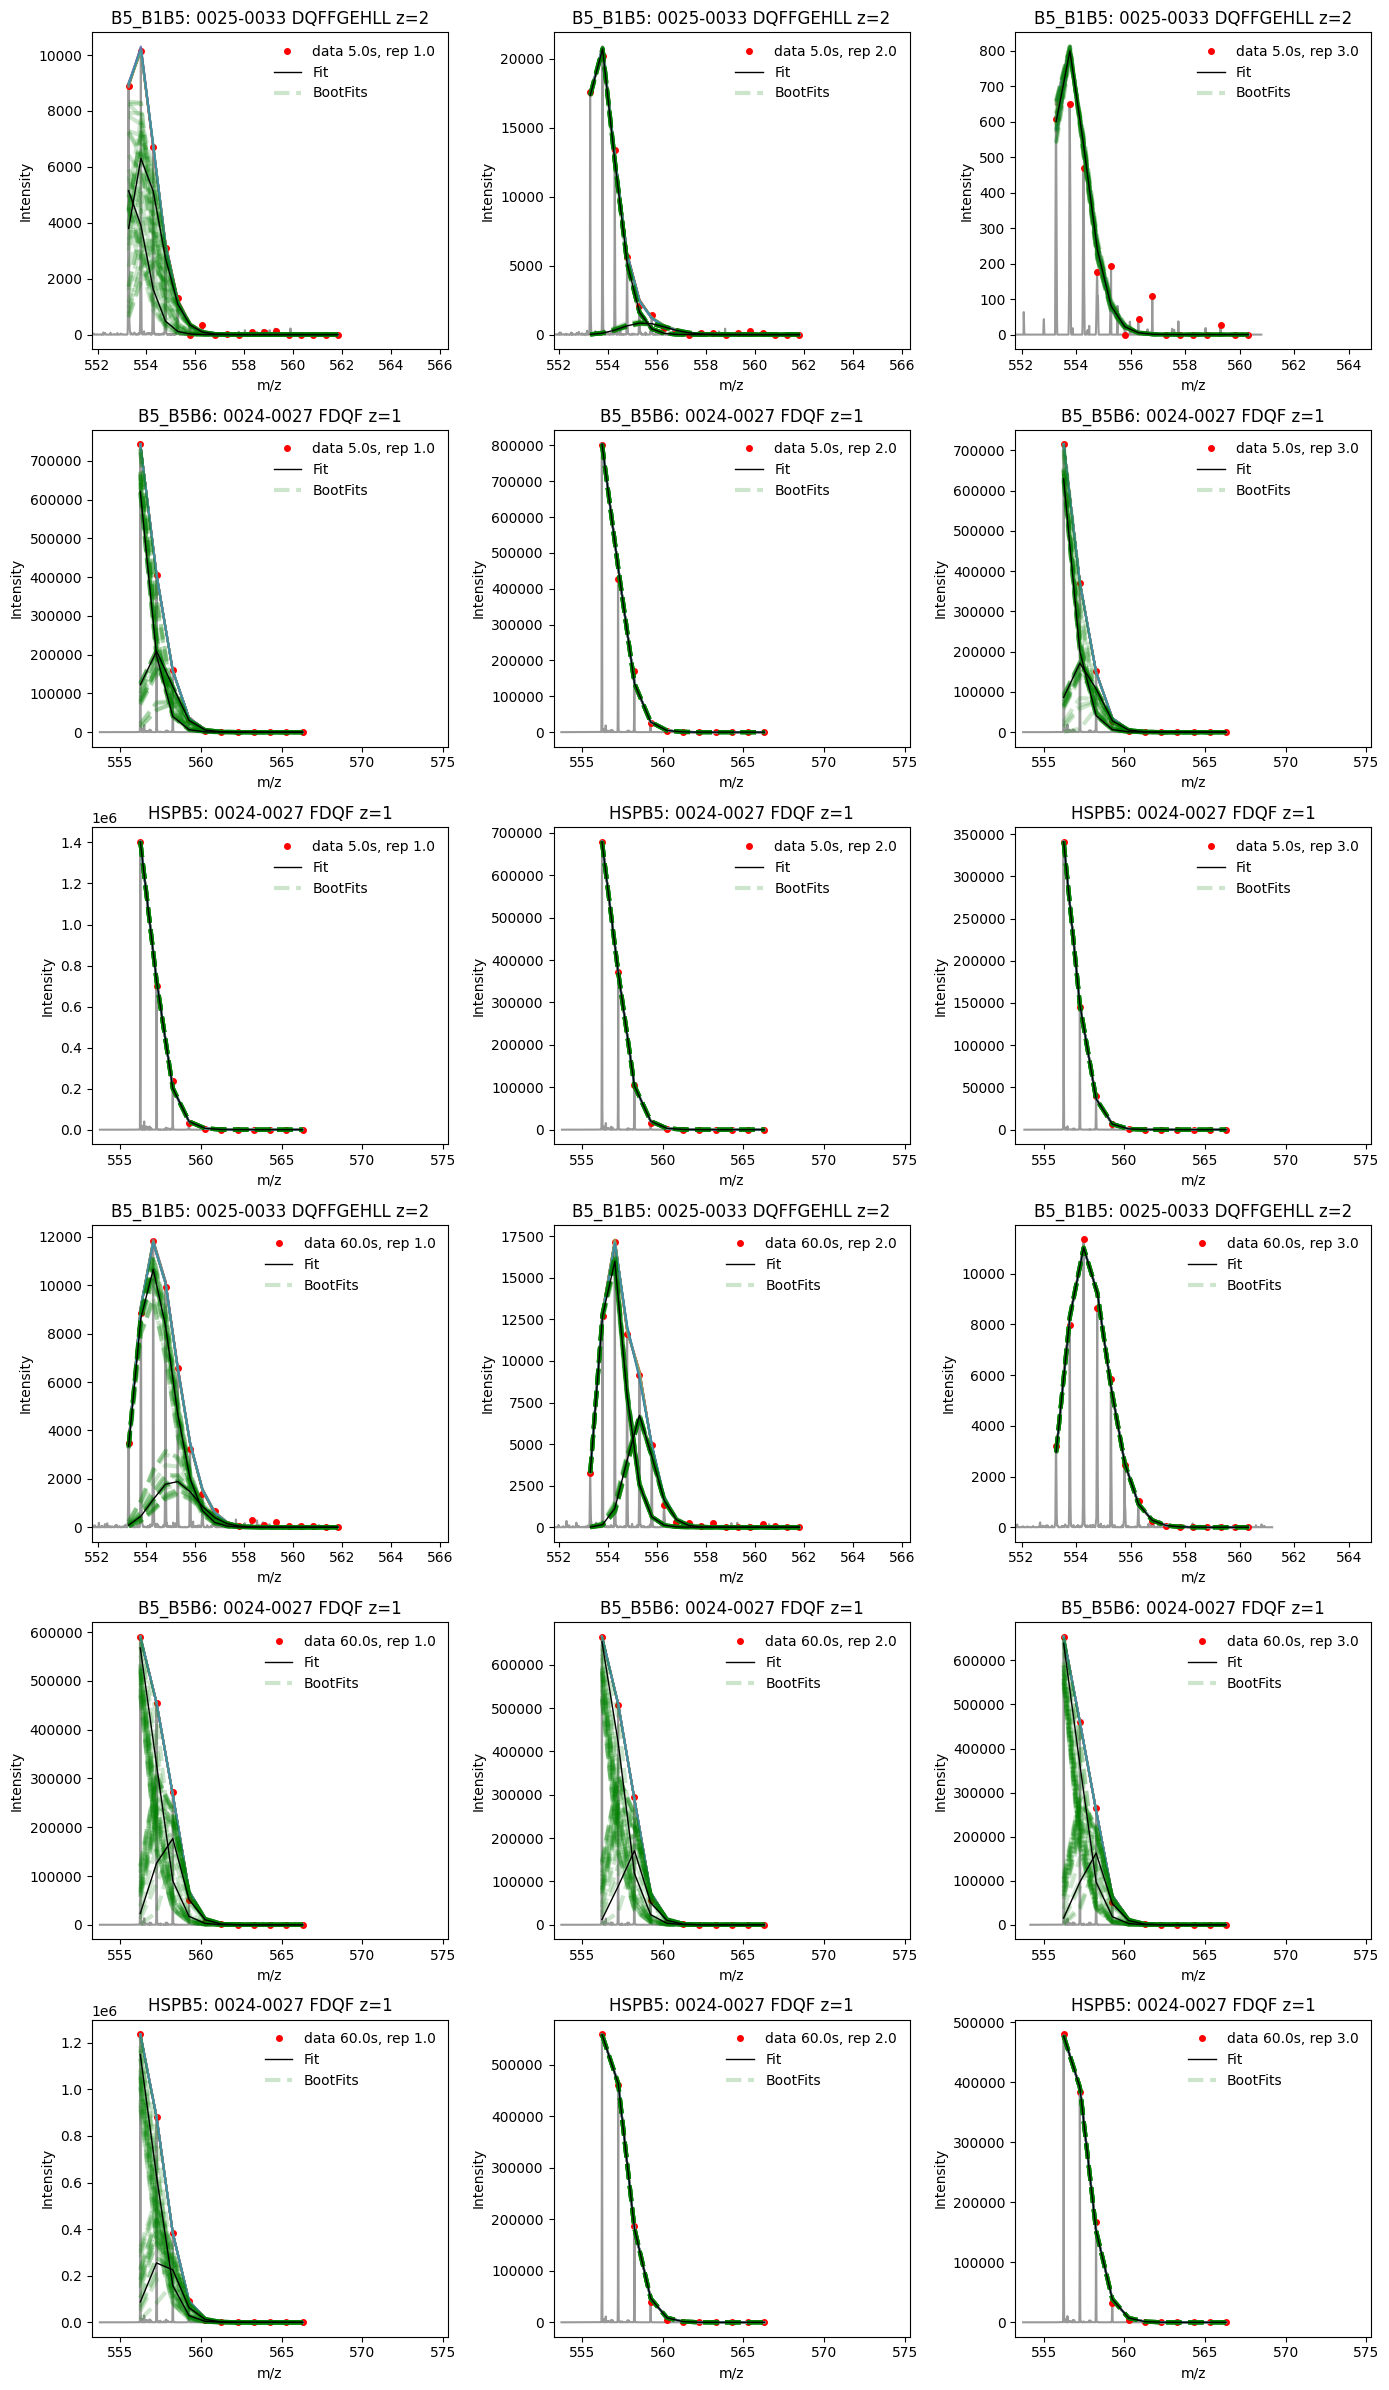

In [7]:
import matplotlib.pyplot as plt
def makelist(thing):
    thing = [thing] if not isinstance(thing, list) else thing
    return thing
def plot_spectrum(deutdata=pd.DataFrame(),rawdata=pd.DataFrame(),fit_params=pd.DataFrame(),ax=None,norm=False,plt_kwargs={}):
    '''
    intended to plot a single spectrum: raw data, picked peaks, and fits
    '''
    if ax is None:
        ax = plt.gca()
    plt_raw = {'color':'#999999'}
    plt_raw.update(plt_kwargs)
    deut_spectra = zip(*[deutdata[col] for col in ['sample','peptide_range','time','rep','charge']])
    deut_spectra = list(dict.fromkeys(deut_spectra))

    for s,p,t,r,z in deut_spectra:
        focal_data = hxex.filter_df(deutdata,quiet=True,samples=s,peptide_ranges=p,timept=t,charge=z,rep=r)
        focal_raw = hxex.filter_df(rawdata,quiet=True,samples=s,peptide_ranges=p,timept=t,charge=z,rep=r)
        focal_fit = hxex.filter_df(fit_params,quiet=True,samples=s,peptide_ranges=p,timept=t,charge=z,rep=r)

        peptide = focal_data['peptide'].values[0]
        peptide_range = focal_data['peptide_range'].values[0]
        shortpeptide = peptide if len(peptide) < 22 else peptide[:9]+'...'+peptide[-9:] #for tidy plot labels

        mz=np.array(focal_data.mz.copy())
        if len(mz) == 0: continue
        y=np.array(focal_data.Intensity.copy())
        scale_y = np.sum(y)
        y_norm = y/scale_y
        rawint = focal_raw.Intensity
        scale_raw = rawint/scale_y
        if (len(deut_spectra) > 1): norm = True
        if (norm==True):
            y = y_norm
            rawint = scale_raw
            scale_y = 1.0
        n_bins = len(y)-1
                
        lowermz = min(mz)
        uppermz = max(mz)

        if len(deut_spectra)>1: pl = (',').join(map(str,[s,p,t,int(r),int(z)])) 
        else: pl='data '+str(t)+'s, rep '+str(r)
        ax.plot(mz, y, 'ro',  markersize='4',label=pl ,zorder=1)
        ax.plot(focal_raw.mz, rawint, **plt_raw ,zorder=0)

        if not focal_fit.empty:
            fits = focal_fit.copy()
            hxex.Current_Isotope = hxex.get_na_isotope(peptide,z,npeaks=None,mod_dict={})
            best_n_curves = fits[fits['nboot']==1]['ncurves'].values[0]
            for nb in range(0,21):
                params_best_fit = fits.copy()[(fits['nboot']==nb) & (fits['ncurves']==best_n_curves)]['Fit_Params'].values[0]
                params_best_fit = [float(x) for x in params_best_fit.split()]
                fit_y = hxex.n_fitfunc( n_bins, *params_best_fit ) * scale_y
                ax.plot( mz, fit_y, '-', alpha=0.5)#label='fit sum N='+str(best_n_curves));

                scaler,nexs,mus,fracs = hxex.get_params(*params_best_fit,sort=True,norm=False,unpack=True)
                fracsum = np.sum(fracs)

                #scaler at 0, n's at 1:best_n_curves+1, mu's at best_n_curves+1:2*best_ncurves+1, fracs at 2*best_n_curves+1:
                for k in range( best_n_curves ):
                    nex = nexs[k]
                    mu = mus[k]                
                    frac = fracs[k]/fracsum                
                    fit_yk = np.power( 10.0, scaler )  * frac * hxex.fitfunc( n_bins, nex, mu, ) * scale_y

                    if nb==0: fit_kwds = {'color':'k','linestyle':'-','linewidth':1,'zorder':10}
                    else: fit_kwds = {'color':'green','linestyle':'dashed','linewidth':3,'alpha':0.2,'zorder':5}
                    if len(deut_spectra) == 1:
                        if (k==0) & (nb==1): fit_kwds.update({'label':'BootFits'})
                        if (k==0) & (nb==0): fit_kwds.update({'label':'Fit'})
                    ax.plot( mz, fit_yk,**fit_kwds)              
    if len(deut_spectra) == 1:
        ax.set(xlim=(lowermz-3/z,uppermz+9/z))
        ax.set_title(label=str(s)+': '+peptide_range+" "+str(shortpeptide)+" z="+str(int(z)),loc='center')
        ax.set_ylabel("Intensity")
    if norm==True: ax.set_ylabel("Normalized Intensity")
    ax.set_xlabel("m/z")
    
    if len(ax.get_legend_handles_labels()[0])>0:
        ax.legend(frameon=False,loc='upper right');

    return

#deut_spectra = zip(*[alldeut[col] for col in ['sample','peptide_range','time','rep','charge']])
#deut_spectra = list(dict.fromkeys(deut_spectra))
# for s,p,t,r,z in deut_spectra[i:i+1]:
#samples = ['HSPB5','B5_B1B5','B5_B1B6']
#times = [0,5,60]
#deut_set = pd.DataFrame()

#
group_by = 'Time'#'Time' #or 'Sample'
s = None#['HSPB5']#,'B5_B5B6']
p = None#'0024-0027'
t = [5  ,60]
z = None
r = None

focal_deut = hxex.filter_df(alldeut,quiet=True,samples=s,peptide_ranges=p,timept=t,charge=z,rep=r)
focal_raw = hxex.filter_df(allraw,quiet=True,samples=s,peptide_ranges=p,timept=t,charge=z,rep=r)
fit_params = hxex.filter_df(allfits,quiet=True,samples=s,peptide_ranges=p,timept=t,charge=z,rep=r)
deut_spectra_reps = zip(*[focal_deut[col] for col in ['sample','peptide_range','time','charge']])
deut_spectra_reps = list(dict.fromkeys(deut_spectra_reps))
if group_by == 'Time': deut_spectra_reps.sort(key=lambda x:(x[2],x[0])) 
else: deut_spectra_reps.sort(key=lambda x:(x[0],x[2])) 
#plot_spectrum(focal_deut,focal_raw,fit_params,) #all of it in one
plt.show()
ncols = int(focal_deut.rep.max()) #columns will always be replicate
nrows = len(deut_spectra_reps)
fig, ax = plt.subplots(figsize=(ncols*4+2, nrows*4), ncols=ncols, nrows = nrows, squeeze=False,num=1,clear=True)
for row, (ss,pp,tt,zz) in enumerate(deut_spectra_reps):
    for col in range(0,ncols):
        #print(row,ss,pp,tt,zz,col+1)
        spec = {'samples':ss,'peptide_ranges':pp,'timept':tt,'charge':zz,'rep':col+1}
        plot_deut = hxex.filter_df(alldeut,quiet=True,**spec)
        plot_raw = hxex.filter_df(allraw,quiet=True,**spec)
        plot_fit = hxex.filter_df(allfits,quiet=True,**spec)

        plot_spectrum(plot_deut,plot_raw,plot_fit,ax=ax[row,col],norm=False)
fig.tight_layout()
plt.show()






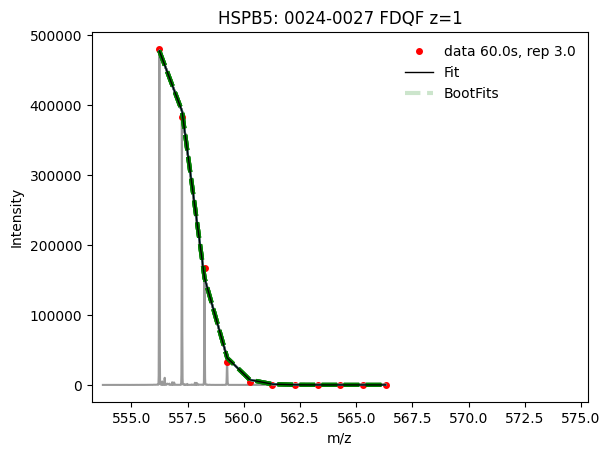

In [411]:
spec = {'samples':'HSPB5','peptide_ranges':'0024-0027','timept':60,'charge':1,'rep':3}
plot_deut = hxex.filter_df(alldeut,quiet=True,**spec)
plot_raw = hxex.filter_df(allraw,quiet=True,**spec)
plot_fit = hxex.filter_df(allfits,quiet=True,**spec)
plot_spectrum(plot_deut,plot_raw,plot_fit)

In [404]:
deut_spectra_reps.sort(key=lambda x:(x[2],x[0])) #2, 0 --> time then sample (sample 1, time 1, sample 2 time 1 ...)
deut_spectra_reps
for i, (ss,pp,tt,zz) in enumerate(deut_spectra_reps):
    print(i,ss,tt,zz)
plot_fit

0 B5_B5B6 5.0 1.0
1 HSPB5 5.0 1.0
2 B5_B5B6 60.0 1.0
3 HSPB5 60.0 1.0


,data_id,sample,peptide,peptide_range,start_seq,end_seq,charge,time,rep,ncurves,nboot,rss,Fit_Params,p-value
512,51,HSPB5,FDQF,0024-0027,24,27,1,5,3,1,0,0.000072,2.6666647130963878e-11 3.9999999948980736 0.02832803998545074 0.9999999999,1.000000
513,51,HSPB5,FDQF,0024-0027,24,27,1,5,3,2,0,0.000006,0.0008157528269235678 1.8917473987336992 0.3990599758441948 0.3081229123474421 0.06435998776794685 0.18470713640351577 0.8441064955177946,0.013799
514,51,HSPB5,FDQF,0024-0027,24,27,1,5,3,1,1,0.000007,7.749335521215301e-13 3.999999999986905 0.028305265226005703 1.0,1.000000
515,51,HSPB5,FDQF,0024-0027,24,27,1,5,3,1,2,0.000007,1.3500584531745999e-15 3.9999999999859464 0.028296726008226643 1.0,1.000000
516,51,HSPB5,FDQF,0024-0027,24,27,1,5,3,1,3,0.000007,1.681787101668607e-13 3.9999775888490934 0.0282929979049748 1.0,1.000000
517,51,HSPB5,FDQF,0024-0027,24,27,1,5,3,1,4,0.000007,7.442679386851893e-13 3.9999999998732103 0.02832086334758743 1.0,1.000000
518,51,HSPB5,FDQF,0024-0027,24,27,1,5,3,1,5,0.000007,1.1061318204958615e-11 3.999999998648198 0.02823646966211197 1.0,1.000000
519,51,HSPB5,FDQF,0024-0027,24,27,1,5,3,1,6,0.000007,9.997736358216016e-10 3.999999928022198 0.02836366120824425 1.0,1.000000
520,51,HSPB5,FDQF,0024-0027,24,27,1,5,3,1,7,0.000007,0.0 3.9999999999574225 0.02835717947389118 1.0,1.000000
521,51,HSPB5,FDQF,0024-0027,24,27,1,5,3,1,8,0.000007,0.0 3.999999999979765 0.028303516339394992 1.0,1.000000


Dataframe filtered to 11 from 733 total datasets
Dataframe filtered to 11 from 733 total datasets
Dataframe filtered to 1146 from 60622 total datasets
Dataframe filtered to 22 from 1250 total datasets


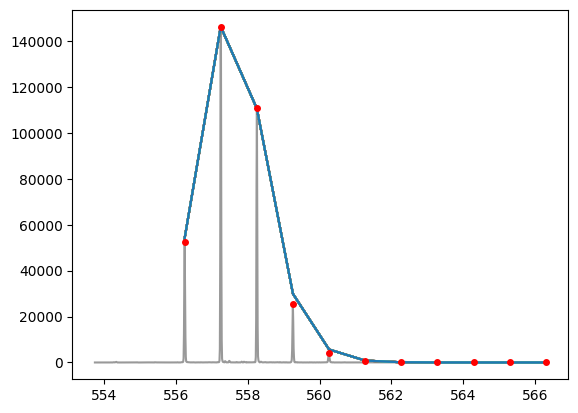

In [164]:
s = 'HSPB5'
p = '0024-0027'
t = 1e6
z = 1
r = 2

peptide = hxex.filter_df(alldeut,quiet=False,samples=s,peptide_ranges=p,timept=t,charge=z,rep=r)['peptide'].values[0]
hxex.Current_Isotope = hxex.get_na_isotope(peptide,z,npeaks=None,mod_dict={})
focal_deut = hxex.filter_df(alldeut,quiet=False,samples=s,peptide_ranges=p,timept=t,charge=z,rep=r)
focal_raw = hxex.filter_df(allraw,quiet=False,samples=s,peptide_ranges=p,timept=t,charge=z,rep=r)
params = hxex.filter_df(allfits,quiet=False,samples=s,peptide_ranges=p,timept=t,charge=z,rep=r)
best_n_curves = params[params['nboot']==1]['ncurves'].values[0]
params_best_fit = params.copy()[(params['nboot']==20) & (params['ncurves']==best_n_curves)]['Fit_Params'].values[0]
params_best_fit = [float(x) for x in params_best_fit.split()]
#allfits
mz=np.array(focal_deut.mz.copy())
y=np.array(focal_deut.Intensity.copy())
n_bins = len(y)-1

plt.plot(mz, y, 'ro',  markersize='4',zorder=10)
plt.plot(focal_raw.mz, focal_raw.Intensity,color='#999999')
for nb in range(0,21):
    params_best_fit = params.copy()[(params['nboot']==nb) & (params['ncurves']==best_n_curves)]['Fit_Params'].values[0]
    params_best_fit = [float(x) for x in params_best_fit.split()]
    fit_y = hxex.n_fitfunc( n_bins, *params_best_fit ) * np.sum(y)
    plt.plot( mz, fit_y, '-', label='fit sum N='+str(best_n_curves));
#plt.legend()
#rss = hxex.calc_rss( y, fit_y, )

In [165]:
hxex.get_na_isotope(peptide,z,npeaks=None,mod_dict={})

array([7.17772243e-01, 2.27382319e-01, 4.66582071e-02, 7.17820552e-03,
       9.03083209e-04, 9.68550272e-05, 9.08661294e-06])

In [ ]:

y_plot = y_norm * scale_y
fit_y = fit_y * scale_y
env_symmetry_adj = 2.0 - (y.max() - env_Int)/y.max()
scaled_env_height = max(y_plot)*config.Env_threshold
env_resolution = env_symmetry_adj *charge * (env[1]-env[0]) / ( len(best_fit) + 1.0 ) #rough measure of whether there's enough information to do the n_curves fit



env_label = "Env res: "+format(env_resolution,'0.2f')#+"/"+format(env_dof,'0.2f')
ax[i,j-1].plot(env,[scaled_env_height,scaled_env_height],label=env_label,color='darkorange')

ax[i,j-1].plot( focal_raw.mz, focal_raw.Intensity, color='#999999' ) #ax[i,j-1]


ax[i,j-1].plot( mz, y_plot, 'ro', label='data '+ timelabel+", rep "+str(j), markersize='4')
ax[i,j-1].vlines( centroid_j, 0, max(y_plot), color='orange' ,label='m/z = '+format(centroid_j,'.2f'),linestyles='dashed',linewidth=2,zorder=10)


ax[i,j-1].plot( mz, fit_y, '-', label='fit sum N='+str(best_n_curves))

if overlay_reps:
    if config.Keep_Raw:
        ax[i,ncols-1].plot( focal_raw.mz, focal_raw.Intensity, color=mpl_colors[j-1],alpha=0.5 ) 
    else: ax[i,ncols-1].vlines( mz, 0.0, y_plot, color=mpl_colors[j-1], alpha=0.5 )
    ax[i,ncols-1].plot( mz, y_plot, 'o',color=mpl_colors_dark[j-1], label="rep "+str(j), markersize='4')
    ax[i,ncols-1].plot( mz, fit_y, '-',color=mpl_colors[j-1])# label='fit sum N='+str(best_n_curves))

scaler,nexs,mus,fracs = get_params(*best_fit,sort=True,norm=False,unpack=True)
fracsum = np.sum(fracs)

#scaler at 0, n's at 1:best_n_curves+1, mu's at best_n_curves+1:2*best_ncurves+1, fracs at 2*best_n_curves+1:
for k in range( best_n_curves ):
    nex = nexs[k]
    nex_err = fstdev[k+1]
    mu = mus[k]
    mu_err = fstdev[k+best_n_curves+1]
    frac = fracs[k]/fracsum
    frac_err = min(1.0,fstdev[-1]/fracsum) #if best_n_curves > 1 else 0.
    fit_yk = np.power( 10.0, scaler )  * frac * fitfunc( n_bins, nex, mu, ) * scale_y
    kindcent = sum(mz*fit_yk)/sum(fit_yk)
    deut_corr_k = (kindcent - centroidUD)*charge * 1/d_corr

    nm_for_label = bnm_avg[k] if config.Full_boot else deut_corr_k
    frac_for_label = bfrac_avg[k] if config.Full_boot else frac 
    #print("nm:",bnm_avg[k],"deut_corr_k",deut_corr_k)
    plot_label = ('pop'+str(k+1)+' = '+format(frac_for_label,'.2f')#+' ± '+format(frac_err,'.2f') 
                        +'\nDabs_'+str(k+1)+' = '+format(nm_for_label,'.1f')#+' ± '+format(nex_err,'.2f')
                        +'\nm/z = '+format(kindcent,'.2f'))
    ax[i,j-1].plot( mz, fit_yk, color = 'black', linestyle='solid',linewidth=1.,label=plot_label)
    ax[i,j-1].set(xlim=(lowermz-3/charge,uppermz+9/charge)) #gives rightside space for legend
ax[i,j-1].set_title(label=str(sample)+': '+peptide_range+" "+str(shortpeptide)+" z="+str(int(charge)),loc='center')
ax[i,j-1].legend(frameon=False,loc='upper right');
ax[i,j-1].set_xlabel("m/z")
ax[i,j-1].set_ylabel("Intensity")

if overlay_reps: 
    ax[i,ncols-1].set_title(label='Replicates Overlay')
    ax[i,ncols-1].set(xlim=(lowermz-3/charge,uppermz+9/charge)) 
    ax[i,ncols-1].legend(frameon=False,loc='upper right',title='data '+ timelabel);
    ax[i,ncols-1].set_xlabel("m/z")
    ax[i,ncols-1].set_ylabel("Intensity")